In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import scipy.stats as sps
from scipy.optimize import curve_fit
from numpy import exp
from sklearn.metrics import r2_score
from scipy.integrate import odeint

ydata = np.array([35.8348877181645,34.3156930776505,34.7361274861449,34.9891711259547,32.1669879285304,32.7608306623919,31.8609349848603,31.8564011743312,28.235062110603,27.0833359042143,26.4860613898039,23.6263144909566,23.885203232307,21.3416389160475,20.5720806912806,15.2502504223896,14.5468144028532,12.529028059356,8.86033934277976,4.79994600226351])
xdata = np.linspace(1, 20, 20)


[-5.10742713  0.09797078 41.46556726]
[[ 1.36768318e+00  1.14342443e-02 -1.87912811e+00]
 [ 1.14342443e-02  9.65798651e-05 -1.54869529e-02]
 [-1.87912811e+00 -1.54869529e-02  2.67700951e+00]]


0.9909813089162104

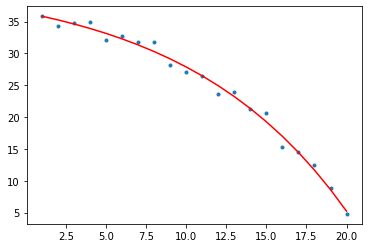

In [19]:
def func(xdata, C1, C2, C3):
    return C1*exp(C2*xdata)+C3

popt, pcov = curve_fit(func, xdata, ydata)

print (popt)
print ( pcov)

plt.plot(xdata, ydata, '.');
plt.plot(xdata, func(xdata, popt[0], popt[1],popt[2]),'r-')

r2_score(ydata, func(xdata, popt[0], popt[1],popt[2]))

Полученное уравнение:
dx/dt = -0.148 ·x + 0.018
0.9901527275965651


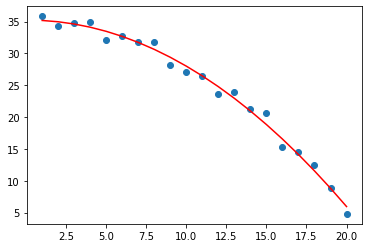

In [36]:
def diff(t, xdata, k1, k2):
  return k1*xdata - k2

def diff_model(t, k1, k2, x0):
  return odeint(diff, x0, t, args=(k1,k2)).ravel()

param, param_cov = curve_fit(diff_model, xdata, ydata)
y0 = param[2]

print('Полученное уравнение:')
print("dx/dt =",round(param[0],3),"·x +",-round(param[1],3))

md_dif = diff_model(xdata, param[0], param[1],param[2])

r2 = r2_score(ydata, ans_dif)
print(r2)

plt.plot (xdata, ydata, 'o')
plt.plot (xdata, md_dif, 'r')
plt.show()

0.9899574216225957

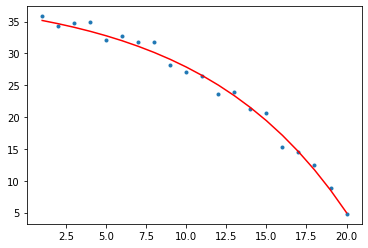

In [33]:
def func(xdata, C1, C2):
    xdata2= [y0]
    for i in range(1, 20):
      xdata2.append(C1*xdata2[i - 1] - C2)
    return xdata2

popt, pcov = curve_fit(func, xdata, ydata)

plt.plot(xdata, ydata, '.');
plt.plot(xdata, func(xdata, popt[0], popt[1]),'r-')

r2_score(ydata, func(xdata, popt[0], popt[1]))